In [29]:
import numpy as np
import pandas as pd
import sys, os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter
import scienceplots
plt.style.use(['science', 'ieee'])

sys.path.append(os.path.join('..', '..', '..'))
from HarderLASSO import HarderLASSOCox

import warnings
warnings.filterwarnings("ignore")

METHODS = [
    'HarderLASSO_QUT', 'HarderLASSO_QUT_ANN',
    'LASSO_QUT',
    'AIC', 'BIC',
    'LASSO_CV', 'LassoNet',
]

# Save dataset name, shape (n, p), number of events
datasets = {
    "SUPPORT": ((8832, 26), 6005),
    "GBSG2": ((686, 9), 299),
    "NKI70": ((144, 75), 48),
    "NSBCD": ((115, 549), 38),
    "MCL": ((92, 574), 64),
    #"RHC": ((5735, 71), 3722),
    #"WHAS500": ((500, 14), 215),
    #"FLCHAIN": ((7874, 8), 2169),
    #"PBC": ((276, 17), 111),
    #"OVARIAN": ((912, 160), 544),
}

for dataset in datasets:
    print(f"{dataset}: {datasets[dataset][1]/datasets[dataset][0][0]:.2f}, events: {datasets[dataset][1]}")

SUPPORT: 0.68, events: 6005
GBSG2: 0.44, events: 299
NKI70: 0.33, events: 48
NSBCD: 0.33, events: 38
MCL: 0.70, events: 64


In [30]:
def parse_features(feature_string):
    """Parse comma-separated feature string into list of integers."""
    if pd.isna(feature_string) or feature_string == '':
        return []
    return [int(float(x.strip())) for x in str(feature_string).split(',')]

def load_simulation_data():
    """Load all simulation results and column selections."""
    all_results = []
    all_true_features = []

    for dataset in datasets.keys():
        results_file =  f'results/{dataset}_results.csv'
        df_results = pd.read_csv(results_file)
        df_results['dataset'] = dataset
        all_results.append(df_results)

    # Combine all data
    results_df = pd.concat(all_results, ignore_index=True)
    return results_df

# Load data
print("Loading simulation data...")
results_df = load_simulation_data()
print(f"Loaded {len(results_df)} result rows")

Loading simulation data...
Loaded 500 result rows


In [31]:
# Parse selected features for each method
print("Parsing selected features...")
for method in METHODS:
    feature_col = f'{method}_features'
    if feature_col in results_df.columns:
        results_df[f'{method}_features'] = results_df[feature_col].apply(parse_features)
        print(f"✓ {method}")

Parsing selected features...
✓ HarderLASSO_QUT
✓ HarderLASSO_QUT_ANN
✓ LASSO_QUT
✓ AIC
✓ BIC
✓ LASSO_CV
✓ LassoNet


In [32]:
def calculate_metrics_for_method(results_df, method):
    """Calculate all metrics for a given method."""
    metrics = []

    for dataset in datasets.keys():
        results = results_df[results_df['dataset'] == dataset].copy()
        sim_metrics = []
        for _, row in results.iterrows():
            selected = row[f'{method}_features']
            c_index = row[f'{method}_c_index']

            sim_metrics.append({
                'simulation': row['simulation'],
                'dataset': dataset,
                'method': method,
                'c_index': c_index,
                'n_selected': len(selected),
            })

        metrics.extend(sim_metrics)

    return pd.DataFrame(metrics)

# Calculate metrics for all methods
print("Calculating metrics for all methods...")
all_metrics = []

for method in METHODS:
    print(f"Processing {method}...", end=' ')
    method_metrics = calculate_metrics_for_method(results_df, method)
    all_metrics.append(method_metrics)
    print(f"✓ ({len(method_metrics)} records)")

# Combine all metrics
metrics_df = pd.concat(all_metrics, ignore_index=True)
print(f"\nTotal metrics calculated: {len(metrics_df)} records")

Calculating metrics for all methods...
Processing HarderLASSO_QUT... ✓ (500 records)
Processing HarderLASSO_QUT_ANN... ✓ (500 records)
Processing LASSO_QUT... ✓ (500 records)
Processing AIC... ✓ (500 records)
Processing BIC... ✓ (500 records)
Processing LASSO_CV... ✓ (500 records)
Processing LassoNet... ✓ (500 records)

Total metrics calculated: 3500 records


In [33]:
# Calculate summary statistics
res_df = metrics_df.groupby(['dataset', 'method']).agg({
    'n_selected': 'mean',
    'c_index': 'mean'
}).reset_index()

In [34]:
for dataset in datasets.keys():
    print(f"\nResults for {dataset}:")
    display(res_df[res_df['dataset'] == dataset])


Results for SUPPORT:


,dataset,method,n_selected,c_index
28,SUPPORT,AIC,12.17,0.598936
29,SUPPORT,BIC,7.27,0.598401
30,SUPPORT,HarderLASSO_QUT,7.37,0.598565
31,SUPPORT,HarderLASSO_QUT_ANN,4.78,0.591781
32,SUPPORT,LASSO_CV,18.43,0.598883
33,SUPPORT,LASSO_QUT,7.02,0.598642
34,SUPPORT,LassoNet,26.00,0.604936



Results for GBSG2:


,dataset,method,n_selected,c_index
0,GBSG2,AIC,4.49,0.668436
1,GBSG2,BIC,2.89,0.670039
2,GBSG2,HarderLASSO_QUT,2.56,0.668364
3,GBSG2,HarderLASSO_QUT_ANN,2.34,0.665764
4,GBSG2,LASSO_CV,6.73,0.670957
5,GBSG2,LASSO_QUT,2.73,0.666890
6,GBSG2,LassoNet,7.16,0.672658



Results for NKI70:


,dataset,method,n_selected,c_index
14,NKI70,AIC,27.03,0.635449
15,NKI70,BIC,14.38,0.651476
16,NKI70,HarderLASSO_QUT,1.42,0.640175
17,NKI70,HarderLASSO_QUT_ANN,1.22,0.611994
18,NKI70,LASSO_CV,24.32,0.682116
19,NKI70,LASSO_QUT,1.61,0.650356
20,NKI70,LassoNet,45.74,0.702308



Results for NSBCD:


,dataset,method,n_selected,c_index
21,NSBCD,AIC,17.28,0.590253
22,NSBCD,BIC,15.45,0.587340
23,NSBCD,HarderLASSO_QUT,1.42,0.635526
24,NSBCD,HarderLASSO_QUT_ANN,1.37,0.638597
25,NSBCD,LASSO_CV,29.55,0.659079
26,NSBCD,LASSO_QUT,2.57,0.677375
27,NSBCD,LassoNet,165.85,0.669407



Results for MCL:


,dataset,method,n_selected,c_index
7,MCL,AIC,21.73,0.614081
8,MCL,BIC,18.95,0.609181
9,MCL,HarderLASSO_QUT,1.04,0.657376
10,MCL,HarderLASSO_QUT_ANN,0.96,0.616089
11,MCL,LASSO_CV,50.20,0.647564
12,MCL,LASSO_QUT,1.39,0.642370
13,MCL,LassoNet,371.97,0.677938


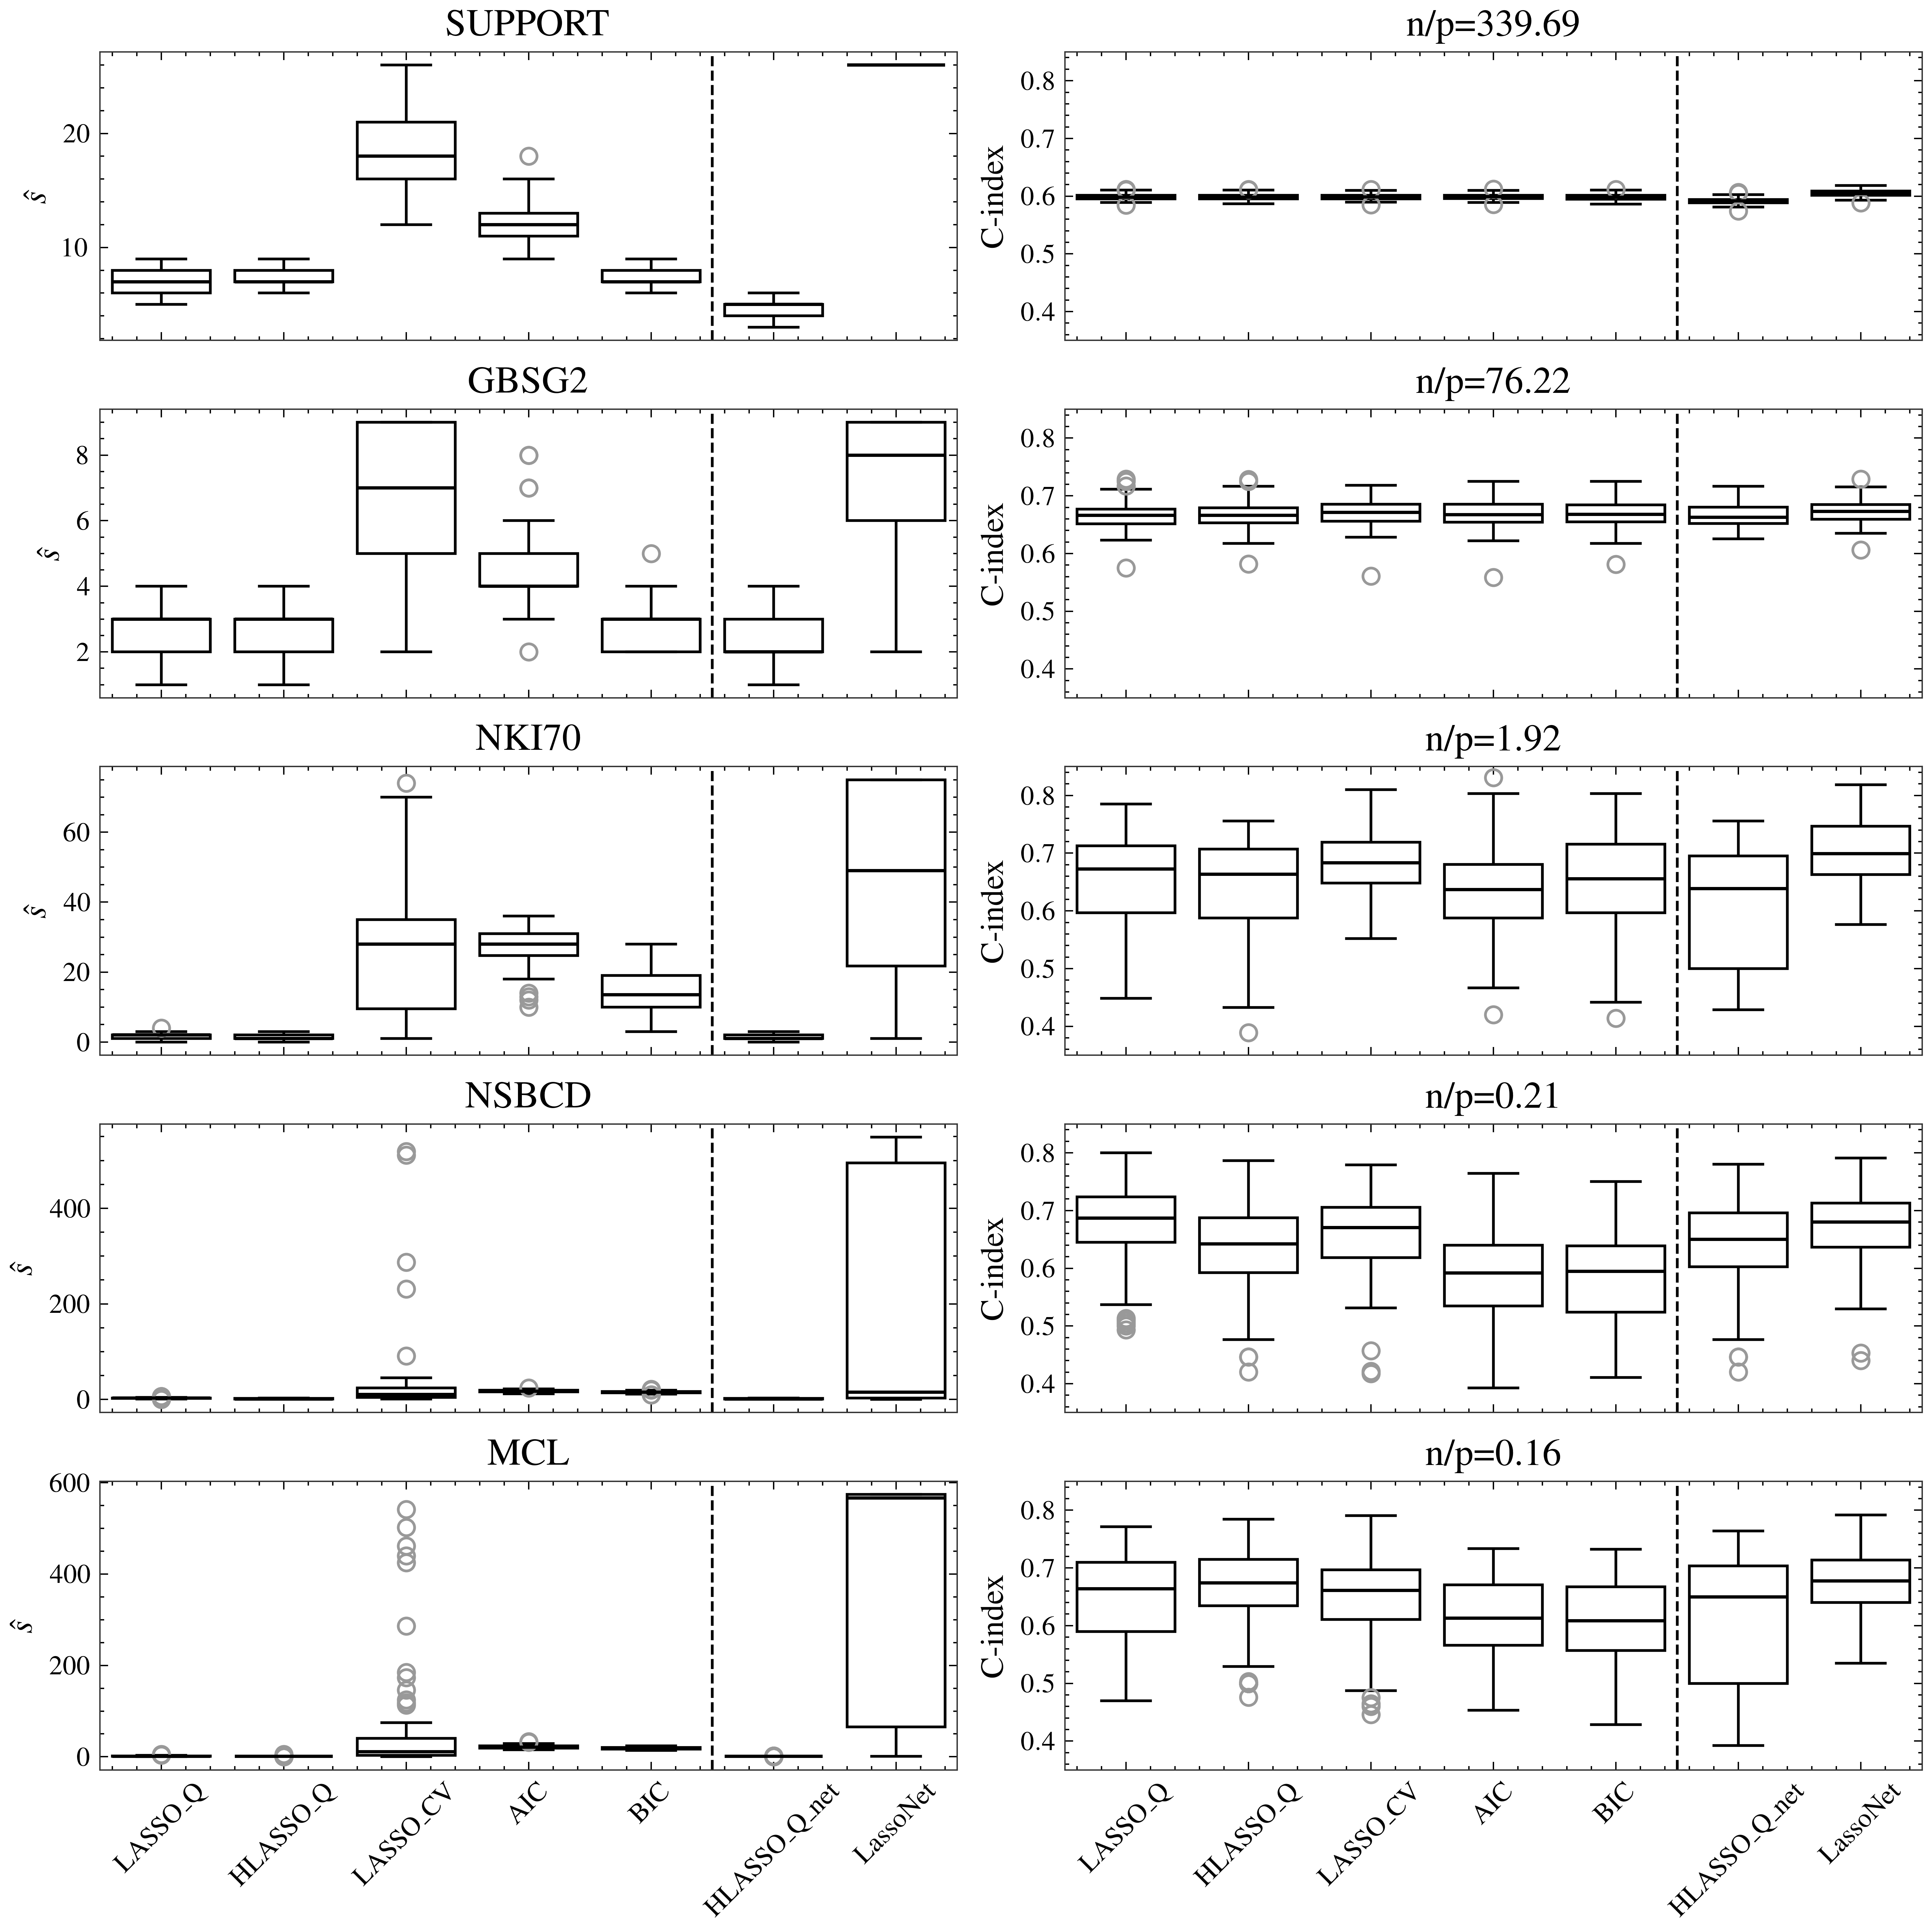

In [35]:
metrics_df = metrics_df.copy()

metrics_df['method'] = metrics_df['method'].replace({
    'HarderLASSO_QUT': 'HLASSO_Q',
    'HarderLASSO_QUT_ANN': 'HLASSO_Q_net',
    'LASSO_QUT': 'LASSO_Q',
    'LASSO_CV': 'LASSO_CV'
})

method_order = ['LASSO_Q', 'HLASSO_Q', 'LASSO_CV', 'AIC', 'BIC', 'HLASSO_Q_net', 'LassoNet']
n_linear = 5

n_datasets = len(datasets)
fig, axes = plt.subplots(
    n_datasets, 2, figsize=(10, 2 * n_datasets), sharex=True
)

if n_datasets == 1:
    axes = axes.reshape(1, -1)

# Define grayscale box style
boxprops = dict(facecolor="white", edgecolor="black")
medianprops = dict(color="black", linewidth=1.2)
whiskerprops = dict(color="black")
capprops = dict(color="black")

for i, (dataset_name, dataset_info) in enumerate(datasets.items()):
    dataset_shape = dataset_info[0]
    dataset_uncensored = dataset_info[1]
    df_subset = metrics_df[metrics_df['dataset'] == dataset_name]

    # --- Left panel: number of selected variables ---
    sns.boxplot(
        data=df_subset, x="method", y="n_selected",
        ax=axes[i, 0], color="white", order=method_order,
        boxprops=boxprops, medianprops=medianprops,
        whiskerprops=whiskerprops, capprops=capprops,
    )
    axes[i, 0].set_title(f"{dataset_name}")
    axes[i, 0].set_xlabel("")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_ylabel(r"$\hat{s}$")
    axes[i, 0].axvline(n_linear - 0.5, color='black', linestyle='--', linewidth=1)
    axes[i, 0].grid(False)

    # --- Right panel: C-index ---
    sns.boxplot(
        data=df_subset, x="method", y="c_index",
        ax=axes[i, 1], color="white", order=method_order,
        boxprops=boxprops, medianprops=medianprops,
        whiskerprops=whiskerprops, capprops=capprops,
    )
    axes[i, 1].set_title(f"n/p={dataset_shape[0]/dataset_shape[1]:.2f}")
    axes[i, 1].set_xlabel("")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_ylabel("C-index")
    min_cindex = df_subset['c_index'].min()
    axes[i, 1].set_ylim(0.35, 0.85)
    axes[i, 1].axvline(n_linear - 0.5, color='black', linestyle='--', linewidth=1)
    axes[i, 1].grid(False)

plt.tight_layout()
#plt.savefig('classical_datasets_analysis.pdf', dpi=500)
plt.show()